## Locate CUSP in Brooklyn
### Xiaomeng Dong, xd515

In [1]:
import geopandas as gpd
import numpy as np
import pylab as pl
%pylab inline
import pandas as pd
import seaborn
import sys
import os
from shapely.geometry import Point, Polygon
from fiona.crs import from_epsg
from censusdata import getdata
import shapely

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### 1. Load census tracks shapfile

In [2]:
getdata()

In [3]:
data = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + '/nycb2010_16d/nycb2010.shp')
data.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


#### 2. Coordinate systems, projections, and transformations 

In [4]:
data = data.to_crs(epsg=4326)

#### 3. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon

In [6]:
data['BoroName'].unique()

array([u'Staten Island', u'Manhattan', u'Brooklyn', u'Bronx', u'Queens'], dtype=object)

In [8]:
data_bk = data[data.BoroName == 'Brooklyn']

In [12]:
data_bk = data_bk.reset_index(drop=True)

#### 4. Find the coordinates of CUSP

In [13]:
CUSP = Point(-73.9888305, 40.6931259)
CUSP = gpd.GeoSeries(CUSP)
CUSP.crs = from_epsg(4326)

#### 5. Locate CUSP in Brooklyn

In [14]:
data_CUSP = data_bk[data_bk.geometry.intersects(CUSP.geometry.ix[0])]
data_CUSP

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
9058,30011001002,3,Brooklyn,1002,001100,462604.348339,2917.605512,POLYGON ((-73.98716132813909 40.69496169589653...


#### 6. Visualize the location of CUSP in Brooklyn

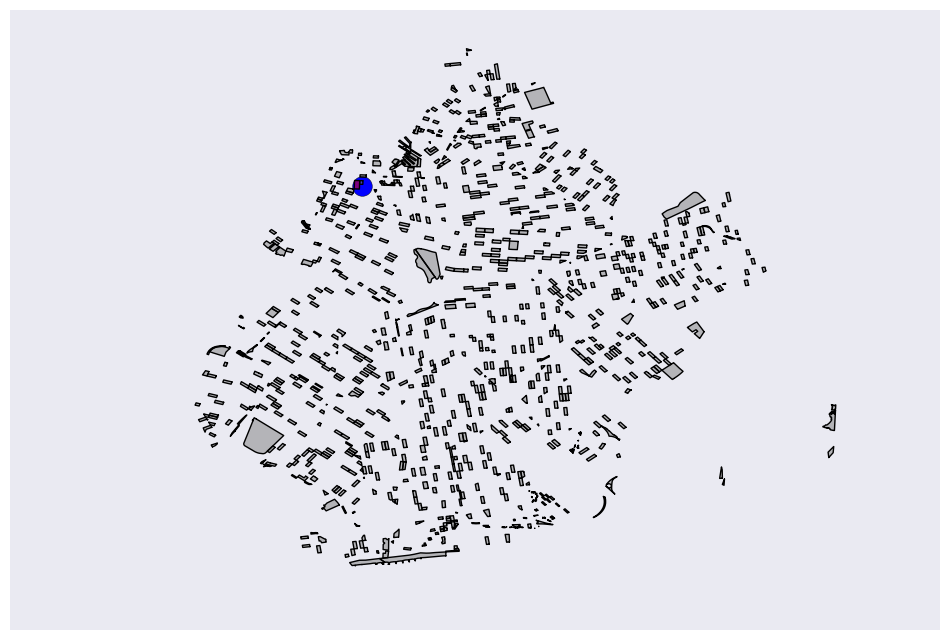

In [16]:
f, ax = plt.subplots(figsize=(12,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
data_bk[::10].plot(ax=ax, color="grey")
data_bk[data_bk.geometry.contains(data_CUSP)].plot(ax=ax, color="red")
ax.scatter(-73.986403, 40.693217, s=200)